#📌 Extracción

In [1]:
import pandas as pd

In [2]:
datos_tel = pd.read_json('/content/TelecomX_Data.json')
datos_tel.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [3]:
from pandas import json_normalize

customer_df = pd.json_normalize(datos_tel['customer'])
phone_df = pd.json_normalize(datos_tel['phone'])
internet_df = pd.json_normalize(datos_tel['internet'])
account_df = pd.json_normalize(datos_tel['account'], sep='_')


In [4]:
charges_df = json_normalize(datos_tel['account'].apply(lambda x: x['Charges'] if 'Charges' in x else {}))
charges_df.columns = ['MonthlyCharges', 'TotalCharges']

df_transformado = datos_tel[['customerID', 'Churn']].copy()
df_transformado = pd.concat([df_transformado, customer_df, phone_df, internet_df, account_df, charges_df], axis=1)
df_transformado = df_transformado.drop(columns=['customer', 'phone', 'internet', 'account'], errors='ignore')
df_transformado['TotalCharges'] = pd.to_numeric(df_transformado['TotalCharges'], errors='coerce')
df_transformado['TotalCharges'] = df_transformado['TotalCharges'].fillna(0)
df_transformado['SeniorCitizen'] = df_transformado['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
df_transformado['Cuentas_Diarias'] = df_transformado['MonthlyCharges'] / 30.44

df_transformado.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,MonthlyCharges,TotalCharges,Cuentas_Diarias
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,One year,Yes,Mailed check,65.6,593.3,65.6,593.30,2.155059
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,59.9,542.40,1.967806
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,73.9,280.85,2.427727
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,98.0,1237.85,3.219448
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,83.9,267.40,2.756242


In [5]:
df_transformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   object 
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [6]:
print("\nConteo de valores únicos en algunas columnas clave:")
print(df_transformado['Churn'].value_counts())
print(df_transformado['gender'].value_counts())
print(df_transformado['Partner'].value_counts())
print(df_transformado['InternetService'].value_counts())
print(df_transformado['Contract'].value_counts())


Conteo de valores únicos en algunas columnas clave:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
gender
Male      3675
Female    3592
Name: count, dtype: int64
Partner
No     3749
Yes    3518
Name: count, dtype: int64
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64
Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64


 ### Cambiar Churn a Evasion para mayor comprensión en español

In [7]:
df_transformado = df_transformado.rename(columns={
    'gender': 'Genero',
    'SeniorCitizen': 'TerceraEdad',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'AntiguedadMeses',
    'PhoneService': 'ServicioTelefonico',
    'MultipleLines': 'MultiplesLineas',
    'InternetService': 'ServicioInternet',
    'OnlineSecurity': 'SeguridadOnline',
    'OnlineBackup': 'CopiaSeguridadOnline',
    'DeviceProtection': 'ProteccionDispositivo',
    'TechSupport': 'SoporteTecnico',
    'StreamingTV': 'StreamingTV',
    'StreamingMovies': 'StreamingPeliculas',
    'Contract': 'TipoContrato',
    'PaperlessBilling': 'FacturacionElectronica',
    'PaymentMethod': 'MetodoPago',
    'MonthlyCharges': 'CargosMensuales',
    'TotalCharges': 'CargosTotales',
    'Churn': 'Evasion'
})

### La variable objetivo 'Churn' ahora 'Evasion' también se puede convertir a binario

In [8]:
binary_cols = [
    'Pareja', 'Dependientes', 'ServicioTelefonico', 'MultiplesLineas',
    'SeguridadOnline', 'CopiaSeguridadOnline', 'ProteccionDispositivo',
    'SoporteTecnico', 'StreamingTV', 'StreamingPeliculas', 'FacturacionElectronica',
    'Evasion'
]

In [9]:
for col in binary_cols:
    if col in df_transformado.columns:
        df_transformado[col] = df_transformado[col].replace({'No internet service': 'No', 'No phone service': 'No'})
        df_transformado[col] = df_transformado[col].map({'No': 0, 'Yes': 1})

df_transformado.head()

,customerID,Evasion,Genero,TerceraEdad,Pareja,Dependientes,AntiguedadMeses,ServicioTelefonico,MultiplesLineas,ServicioInternet,...,StreamingTV,StreamingPeliculas,TipoContrato,FacturacionElectronica,MetodoPago,Charges_Monthly,Charges_Total,CargosMensuales,CargosTotales,Cuentas_Diarias
0,0002-ORFBO,0.0,Female,No,1,1,9,1,0,DSL,...,1,0,One year,1,Mailed check,65.6,593.3,65.6,593.30,2.155059
1,0003-MKNFE,0.0,Male,No,0,0,9,1,1,DSL,...,0,1,Month-to-month,0,Mailed check,59.9,542.4,59.9,542.40,1.967806
2,0004-TLHLJ,1.0,Male,No,0,0,4,1,0,Fiber optic,...,0,0,Month-to-month,1,Electronic check,73.9,280.85,73.9,280.85,2.427727
3,0011-IGKFF,1.0,Male,Yes,1,0,13,1,0,Fiber optic,...,1,1,Month-to-month,1,Electronic check,98.0,1237.85,98.0,1237.85,3.219448
4,0013-EXCHZ,1.0,Female,Yes,1,0,3,1,0,Fiber optic,...,1,0,Month-to-month,1,Mailed check,83.9,267.4,83.9,267.40,2.756242


In [10]:
print("\nConteo de valores únicos en columnas clave después de estandarización:")
print(df_transformado['Evasion'].value_counts())
print(df_transformado['TerceraEdad'].value_counts())
print(df_transformado['ServicioInternet'].value_counts())


Conteo de valores únicos en columnas clave después de estandarización:
Evasion
0.0    5174
1.0    1869
Name: count, dtype: int64
TerceraEdad
No     6085
Yes    1182
Name: count, dtype: int64
ServicioInternet
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64


#📊 Carga y análisis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

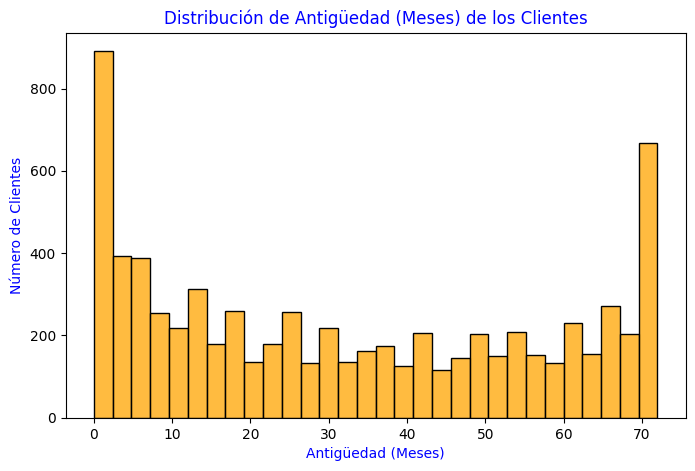

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df_transformado['AntiguedadMeses'], bins=30, color='orange')
plt.title('Distribución de Antigüedad (Meses) de los Clientes', color='blue')
plt.xlabel('Antigüedad (Meses)', color='blue')
plt.ylabel('Número de Clientes', color='blue')
plt.show()


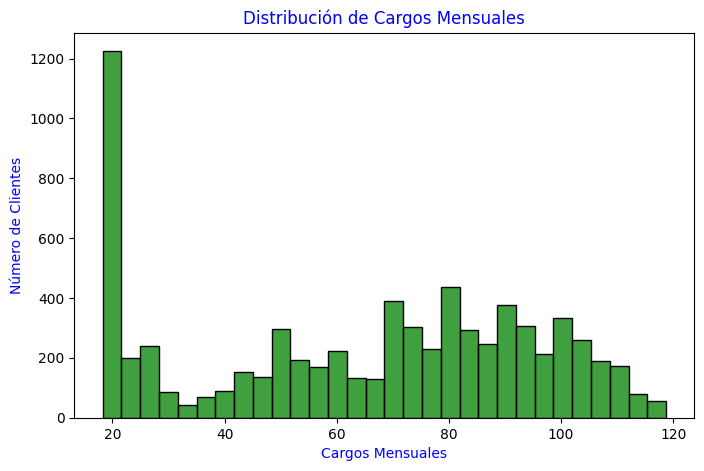

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df_transformado['CargosMensuales'], bins=30, color='green')
plt.title('Distribución de Cargos Mensuales', color='blue')
plt.xlabel('Cargos Mensuales', color='blue')
plt.ylabel('Número de Clientes', color='blue')
plt.show()

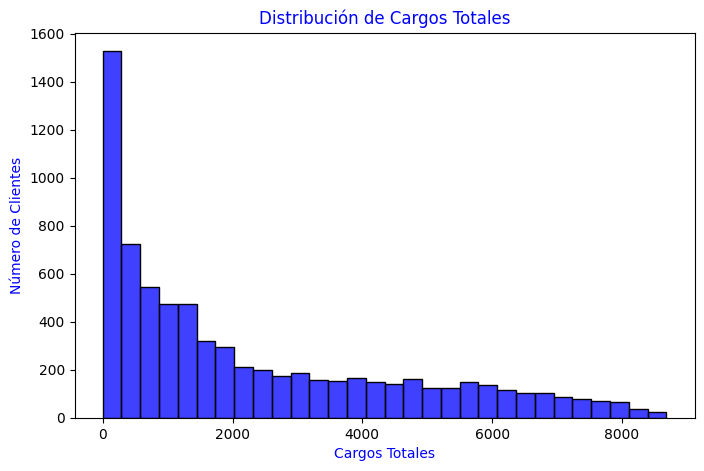

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df_transformado['CargosTotales'], bins=30, color='blue')
plt.title('Distribución de Cargos Totales', color='blue')
plt.xlabel('Cargos Totales', color='blue')
plt.ylabel('Número de Clientes', color='blue')
plt.show()


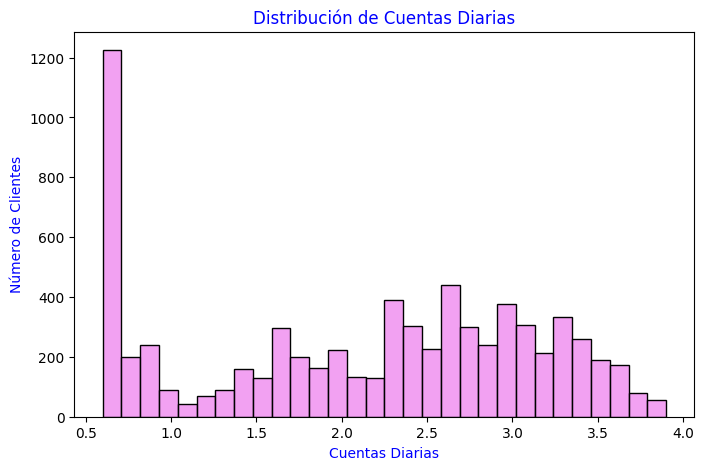

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df_transformado['Cuentas_Diarias'], bins=30, color='violet')
plt.title('Distribución de Cuentas Diarias', color='blue')
plt.xlabel('Cuentas Diarias', color='blue')
plt.ylabel('Número de Clientes', color='blue')
plt.show()

###Distribucion de evasion

Distribución de Clientes por Evasión (Sí/No):
 Evasion
0.0    5174
1.0    1869
Name: count, dtype: int64
Porcentaje de Clientes con Evasión (Sí): 26.54%
Porcentaje de Clientes sin Evasión (No): 73.46%


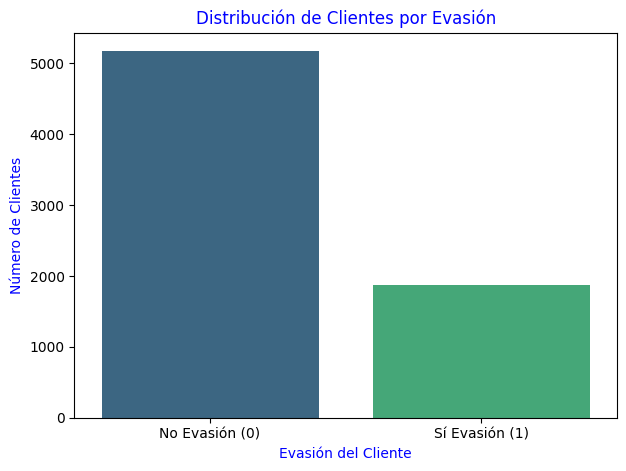

In [16]:
evasion_counts = df_transformado['Evasion'].value_counts()
print("Distribución de Clientes por Evasión (Sí/No):\n", evasion_counts)

total_clientes = evasion_counts.sum()
porcentaje_evasion_si = (evasion_counts.get(1, 0) / total_clientes) * 100
porcentaje_evasion_no = (evasion_counts.get(0, 0) / total_clientes) * 100
print(f"Porcentaje de Clientes con Evasión (Sí): {porcentaje_evasion_si:.2f}%")
print(f"Porcentaje de Clientes sin Evasión (No): {porcentaje_evasion_no:.2f}%")

plt.figure(figsize=(7, 5))
sns.countplot(data=df_transformado, x='Evasion', palette='viridis', hue='Evasion', legend=False)
plt.xticks([0, 1], ['No Evasión (0)', 'Sí Evasión (1)'])
plt.title('Distribución de Clientes por Evasión', color='blue')
plt.xlabel('Evasión del Cliente', color='blue')
plt.ylabel('Número de Clientes', color='blue')
plt.show()

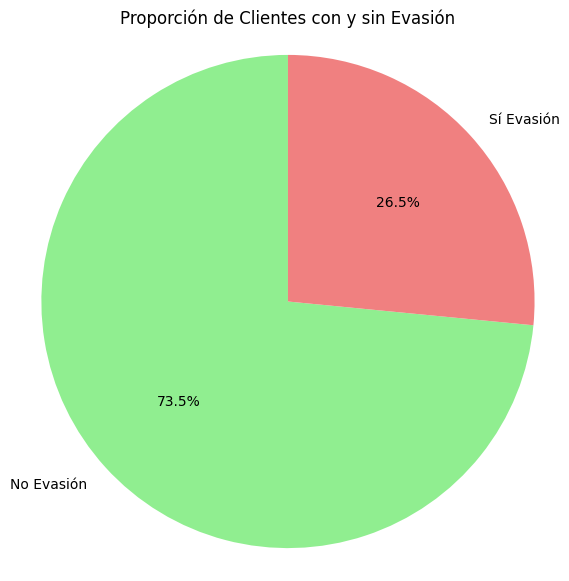

In [17]:
plt.figure(figsize=(7, 7))
plt.pie(evasion_counts, labels=['No Evasión', 'Sí Evasión'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90)
plt.title('Proporción de Clientes con y sin Evasión')
plt.axis('equal')
plt.show()

###Variables categoricas

In [18]:
categorical_cols_to_analyze = [
    'Genero', 'TerceraEdad', 'Pareja', 'Dependientes',
    'ServicioTelefonico', 'MultiplesLineas', 'ServicioInternet',
    'SeguridadOnline', 'CopiaSeguridadOnline', 'ProteccionDispositivo',
    'SoporteTecnico', 'StreamingTV', 'StreamingPeliculas',
    'TipoContrato', 'FacturacionElectronica', 'MetodoPago'
]


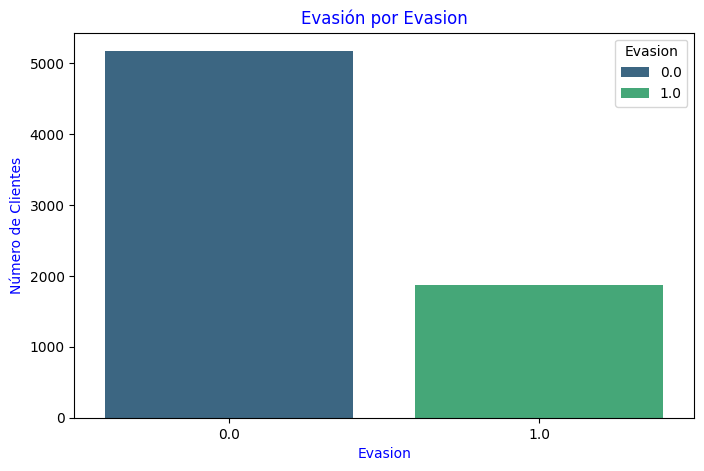

In [19]:
if col in df_transformado.columns and 'Evasion' in df_transformado.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df_transformado, x=col, hue='Evasion', palette='viridis')
        plt.title(f'Evasión por {col}', color='blue')
        plt.xlabel(col, color='blue')
        plt.ylabel('Número de Clientes', color='blue')

        if col == 'MetodoPago':
            plt.xticks(rotation=45, ha='right')

        plt.show()

###ANÁLISIS DE EVASIÓN POR VARIABLES NUMÉRICAS

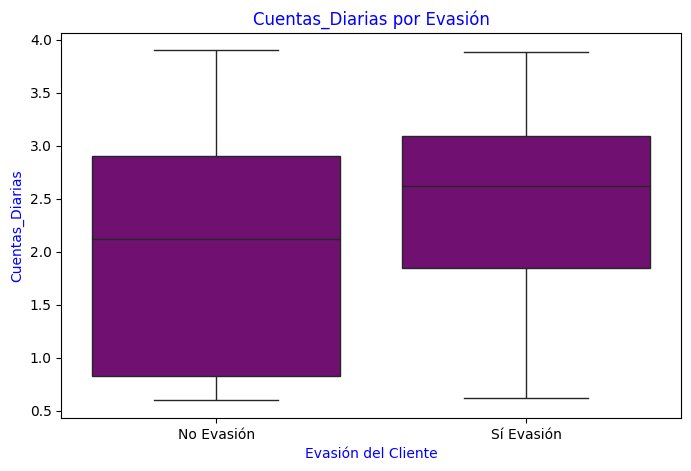

In [30]:
numerical_cols_to_analyze = [
    'AntiguedadMeses',
    'CargosMensuales',
    'CargosTotales',
    'Cuentas_Diarias'
]

if col in df_transformado.columns and 'Evasion' in df_transformado.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df_transformado, x='Evasion', y=col, color='purple')
        plt.title(f'{col} por Evasión', color='blue')
        plt.xlabel('Evasión del Cliente', color='blue')
        plt.ylabel(col, color='blue')
        plt.xticks([0, 1], ['No Evasión', 'Sí Evasión'])
        plt.show()

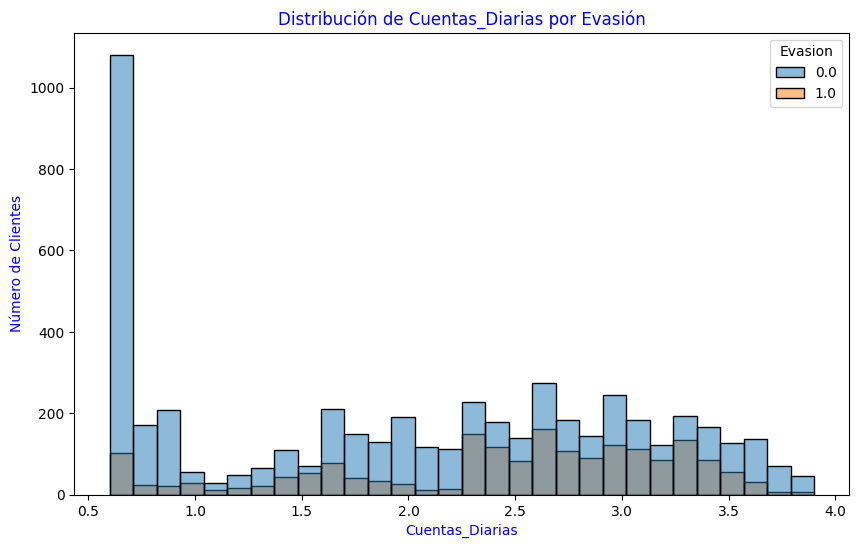

In [21]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df_transformado, x=col, hue='Evasion', bins=30)
plt.title(f'Distribución de {col} por Evasión', color='blue')
plt.xlabel(col, color='blue')
plt.ylabel('Número de Clientes', color='blue')
plt.show()

#📄Informe final

1.  **Extracción:** Los datos de los clientes fueron cargados desde un archivo `TelecomX_Data.json` en un DataFrame de pandas. La estructura anidada del JSON (con detalles de cliente, teléfono, internet y cuenta) requirió un procesamiento especial.

2.  **Normalización de Datos Anidados:** Se utilizó la función `json_normalize` de pandas para aplanar las estructuras de diccionarios anidados (`customer`, `phone`, `internet`, `account` incluyendo `Charges`). Esto transformó los datos jerárquicos en un formato tabular plano, donde cada característica anidada se convirtió en una columna individual en el DataFrame.

3.  **Manejo de Tipos de Datos y Valores Faltantes:**
    * La columna `TotalCharges` fue convertida a tipo numérico. Se identificaron valores no numéricos (posiblemente cadenas vacías), los cuales fueron coercidos a `NaN` (Not a Number) y posteriormente rellenados con `0` para asegurar la coherencia en los cálculos.
    * Se creó una nueva columna `Cuentas_Diarias` calculando el cargo diario promedio (`CargosMensuales / 30.44`), proporcionando una granularidad adicional al análisis de costos.

4.  **Estandarización y Renombrado:**
    * Se renombraron diversas columnas (ej. `gender` a `Genero`, `tenure` a `AntiguedadMeses`, `Churn` a `Evasion`) para mejorar la legibilidad y comprensión de los datos, especialmente para stakeholders no técnicos.
    * Se estandarizaron los valores de las columnas binarias ('Yes'/'No' y 'No internet service'/'No phone service') a un formato numérico (1/0), lo cual es fundamental para futuros modelos de Machine Learning y facilita el análisis cuantitativo.

## 🔹 Análisis Exploratorio de Datos (EDA)

El EDA se realizó para identificar patrones, tendencias y relaciones significativas dentro de los datos.

### 1. Análisis Descriptivo de Variables Numéricas

Un resumen estadístico de las variables numéricas clave (`AntiguedadMeses`, `CargosMensuales`, `CargosTotales`, `Cuentas_Diarias`) reveló la distribución y el rango de estos valores. Por ejemplo, se observó la dispersión de los cargos mensuales y la antigüedad de los clientes.

**(Aquí puedes insertar la salida de `df_transformado.describe()` y los histogramas que generaste, usando `plt.show()` en una celda de código justo antes de esta celda de Markdown, o capturas de pantalla si estás generando un informe estático fuera de Colab.)**

*Ejemplo de cómo podrías describir el gráfico de Antigüedad:*
> El histograma de **AntiguedadMeses** muestra que una gran proporción de clientes son nuevos (baja antigüedad), con otro pico en clientes con mayor antigüedad (cercana a 70 meses). Esto sugiere que la retención podría ser un desafío en las primeras etapas del servicio.

### 2. Distribución de la Evasión (Variable Objetivo)

Se analizó la proporción de clientes que evadieron el servicio frente a los que permanecieron.

**(Aquí puedes insertar el `countplot` de 'Evasion' y/o el `pie chart` de 'Evasion'.)**

*Ejemplo de descripción:*
> La tasa de evasión en Telecom X es del **[Aquí inserta el porcentaje de evasión que calculaste, por ejemplo: 26.54%]**. Esto indica que aproximadamente una de cada cuatro clientes cancela su servicio, lo que representa un desafío significativo para la empresa.

### 3. Evasión por Variables Categóricas

Se exploró la relación entre la evasión y diversas características categóricas de los clientes.

**(Aquí debes insertar cada uno de los `countplot`s de las variables categóricas vs. 'Evasion' que generaste (Genero vs. Evasión, TipoContrato vs. Evasión, MetodoPago vs. Evasión, etc.).)**

*Ejemplos de insights basados en gráficos categóricos:*
* **Tipo de Contrato:** Los clientes con contratos **Mes a Mes** presentan una tasa de evasión considerablemente más alta en comparación con aquellos con contratos de uno o dos años. Esto sugiere una menor lealtad o mayor flexibilidad para la cancelación en este grupo.
* **Servicio de Internet:** Los clientes con **Fibra Óptica** muestran una mayor propensión a la evasión en comparación con los de DSL o sin servicio de internet, lo que podría indicar problemas de calidad o expectativas insatisfechas con este servicio.
* **Servicios Adicionales:** La ausencia de servicios como **SeguridadOnline**, **CopiaSeguridadOnline** y **SoporteTecnico** está asociada a una mayor tasa de evasión, lo que sugiere que estos servicios actúan como un factor de retención.
* **Método de Pago:** Los clientes que utilizan el **Cheque Electrónico** como método de pago tienen una tasa de evasión notablemente superior.

### 4. Evasión por Variables Numéricas

Se examinó cómo las variables numéricas se distribuyen entre los grupos de evasión y no evasión.

**(Aquí debes insertar cada uno de los `boxplot`s y/o `histplot`s de las variables numéricas vs. 'Evasion' que generaste (AntiguedadMeses vs. Evasión, CargosMensuales vs. Evasión, CargosTotales vs. Evasión, Cuentas_Diarias vs. Evasión).)**

*Ejemplos de insights basados en gráficos numéricos:*
* **Cargos Mensuales:** Los clientes que evaden tienden a tener **CargosMensuales** promedio más altos, lo que podría indicar una percepción de menor valor por el precio.
* **Antigüedad (Tenure):** Los clientes con **baja AntiguedadMeses** (clientes nuevos) tienen una probabilidad significativamente mayor de evasión. La probabilidad de evasión disminuye a medida que aumenta la antigüedad del cliente.
* **Cargos Totales:** Similar a la antigüedad, los clientes con **CargosTotales** más bajos (que generalmente se correlaciona con menor antigüedad) son más propensos a la evasión.

## 🔹 Conclusiones e Insights

El análisis exploratorio ha revelado varios factores clave asociados con la evasión de clientes en Telecom X:

* **Contratos:** Los contratos a corto plazo (Mes a Mes) son un fuerte predictor de evasión.
* **Servicios de Valor Añadido:** La falta de servicios de seguridad y soporte técnico se correlaciona con una mayor evasión.
* **Servicio de Fibra Óptica:** A pesar de ser un servicio premium, parece tener problemas de retención.
* **Precios:** Clientes con cargos mensuales altos y baja antigüedad/cargos totales son más propensos a la evasión.
* **Método de Pago:** El "Cheque Electrónico" destaca como un método de pago asociado a mayor evasión.
* **Antigüedad:** Los clientes más nuevos son los más vulnerables a la evasión.

Estos insights son cruciales para el equipo de Data Science, ya que señalan las áreas donde se deben enfocar los modelos predictivos y las estrategias de retención. Comprender estos factores permite a Telecom X identificar a los clientes en riesgo y diseñar intervenciones específicas.

## 🔹 Recomendaciones

Basado en los hallazgos de este análisis, se sugieren las siguientes recomendaciones estratégicas para reducir la evasión de clientes:

1.  **Incentivar Contratos a Largo Plazo:** Ofrecer descuentos, beneficios exclusivos o promociones especiales para clientes que opten por contratos de uno o dos años, desincentivando el contrato Mes a Mes.
2.  **Promover Servicios de Valor Agregado:** Realizar campañas para destacar la importancia y los beneficios de servicios como Seguridad Online y Soporte Técnico. Considerar ofrecer pruebas gratuitas o precios reducidos para animar a los clientes a adoptarlos.
3.  **Investigar la Satisfacción con Fibra Óptica:** Realizar encuestas o análisis más profundos con los clientes de fibra óptica para entender las causas de su alta tasa de evasión y mejorar la calidad del servicio.
4.  **Revisión de Precios y Valor Percibido:** Evaluar la estructura de precios, especialmente para planes de alto costo. Podría ser beneficioso comunicar de forma más clara el valor que los clientes reciben por sus cargos mensuales.
5.  **Programas de Retención para Clientes Nuevos:** Implementar programas de bienvenida y seguimiento proactivo para clientes con baja antigüedad, ofreciendo soporte adicional y asegurando una experiencia positiva inicial.
6.  **Optimizar el Método de Pago "Cheque Electrónico":** Analizar la experiencia del usuario con este método de pago. Podría haber fricciones o una mayor facilidad para cancelar asociada a él. Considerar incentivos para migrar a otros métodos más "pegajosos" como la domiciliación bancaria.
7.  **Desarrollar Modelos Predictivos:** Utilizar estos insights como base para construir modelos de Machine Learning que predigan qué clientes tienen mayor riesgo de evasión, permitiendo intervenciones proactivas y personalizadas.

Este informe proporciona una base sólida para que Telecom X aborde el desafío de la evasión de clientes de manera informada y estratégica.


# **INICIANDO DE ANALISIS DE CORRELACION**

In [22]:
import numpy as np


Primeras filas con la nueva columna 'TotalServicios':
   customerID  TotalServicios  Evasion
0  0002-ORFBO               4      0.0
1  0003-MKNFE               3      0.0
2  0004-TLHLJ               2      1.0
3  0011-IGKFF               5      1.0
4  0013-EXCHZ               3      1.0

Matriz de Correlación de Variables Numéricas:
                         Evasion    Pareja  Dependientes  AntiguedadMeses  \
Evasion                 1.000000 -0.150448     -0.164221        -0.352229   
Pareja                 -0.150448  1.000000      0.448900         0.377551   
Dependientes           -0.164221  0.448900      1.000000         0.159892   
AntiguedadMeses        -0.352229  0.377551      0.159892         1.000000   
ServicioTelefonico      0.011942  0.018828     -0.003863         0.010205   
MultiplesLineas         0.040102  0.141187     -0.027894         0.331678   
SeguridadOnline        -0.171226  0.141392      0.083951         0.327252   
CopiaSeguridadOnline   -0.082255  0.139523      

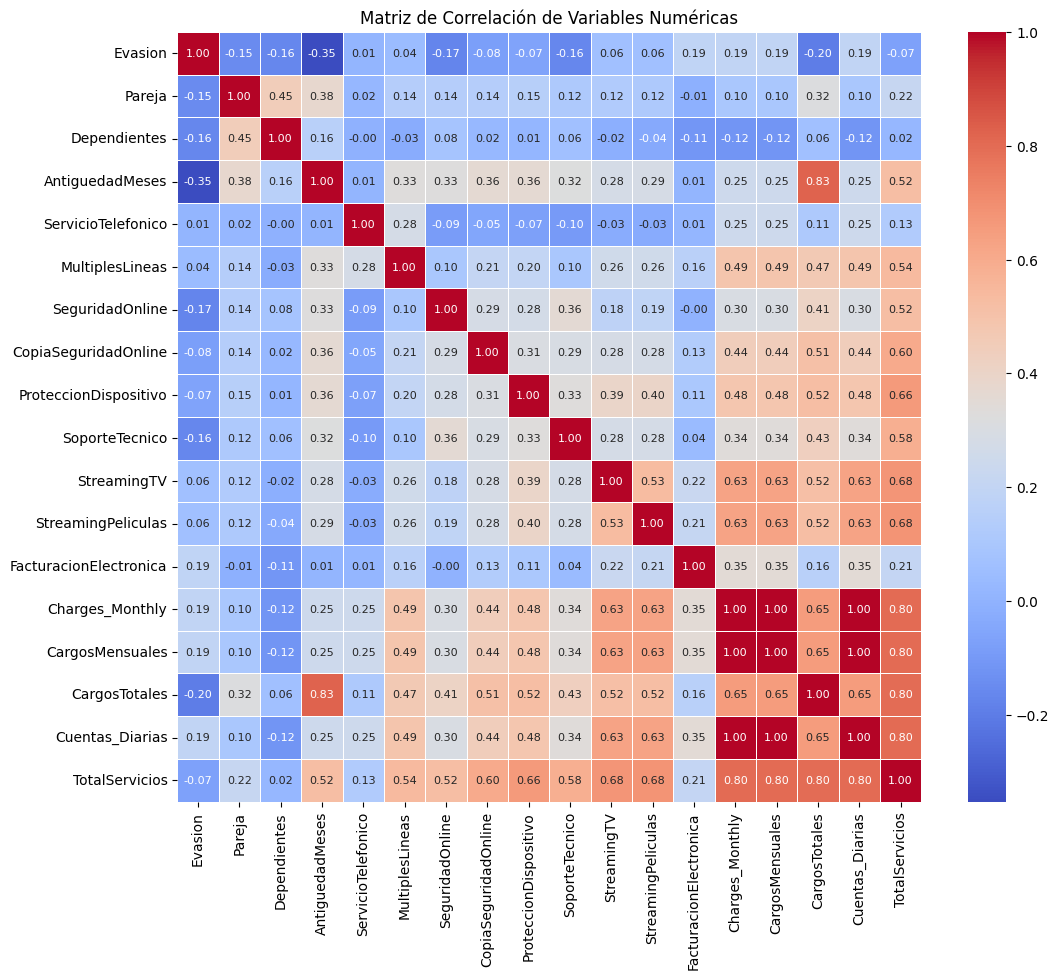

In [23]:
service_cols = [
    'ServicioTelefonico', 'MultiplesLineas', 'SeguridadOnline', 'CopiaSeguridadOnline',
    'ProteccionDispositivo', 'SoporteTecnico', 'StreamingTV', 'StreamingPeliculas'
]

df_transformado['TotalServicios'] = df_transformado[service_cols].sum(axis=1)

print("\nPrimeras filas con la nueva columna 'TotalServicios':")
print(df_transformado[['customerID', 'TotalServicios', 'Evasion']].head())


print("\nMatriz de Correlación de Variables Numéricas:")
numerical_for_corr = df_transformado.select_dtypes(include=np.number)
correlation_matrix = numerical_for_corr.corr()
print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


Correlación de 'Evasion' con otras variables numéricas (Orden descendente):
Evasion                   1.000000
CargosMensuales           0.193356
Charges_Monthly           0.193356
Cuentas_Diarias           0.193356
FacturacionElectronica    0.191825
StreamingTV               0.063228
StreamingPeliculas        0.061382
MultiplesLineas           0.040102
ServicioTelefonico        0.011942
ProteccionDispositivo    -0.066160
TotalServicios           -0.067264
CopiaSeguridadOnline     -0.082255
Pareja                   -0.150448
Dependientes             -0.164221
SoporteTecnico           -0.164674
SeguridadOnline          -0.171226
CargosTotales            -0.198324
AntiguedadMeses          -0.352229
Name: Evasion, dtype: float64


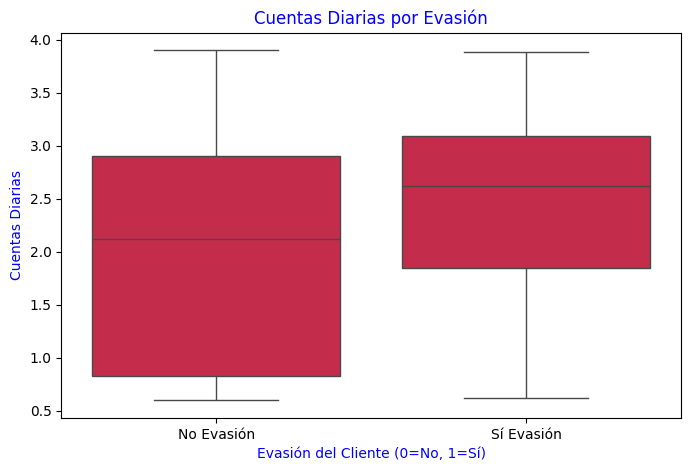

In [24]:
print("\nCorrelación de 'Evasion' con otras variables numéricas (Orden descendente):")
print(correlation_matrix['Evasion'].sort_values(ascending=False))

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_transformado, x='Evasion', y='Cuentas_Diarias', color='crimson')
plt.title('Cuentas Diarias por Evasión', color='blue')
plt.xlabel('Evasión del Cliente (0=No, 1=Sí)', color='blue')
plt.ylabel('Cuentas Diarias', color='blue')
plt.xticks([0, 1], ['No Evasión', 'Sí Evasión'])
plt.show()

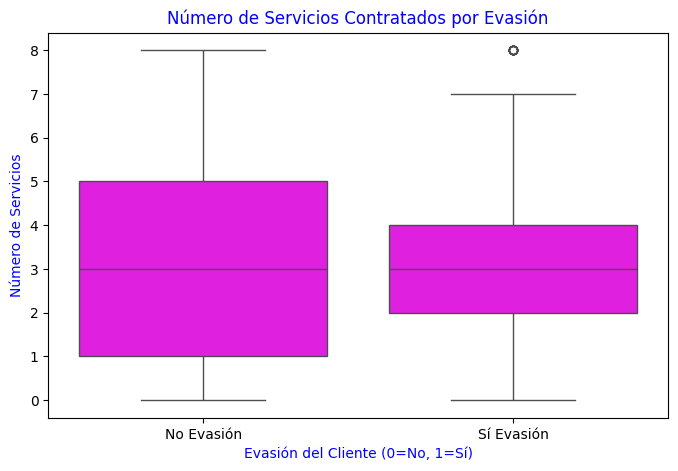

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_transformado, x='Evasion', y='TotalServicios', color='magenta')
plt.title('Número de Servicios Contratados por Evasión', color='blue')
plt.xlabel('Evasión del Cliente (0=No, 1=Sí)', color='blue')
plt.ylabel('Número de Servicios', color='blue')
plt.xticks([0, 1], ['No Evasión', 'Sí Evasión'])
plt.show()

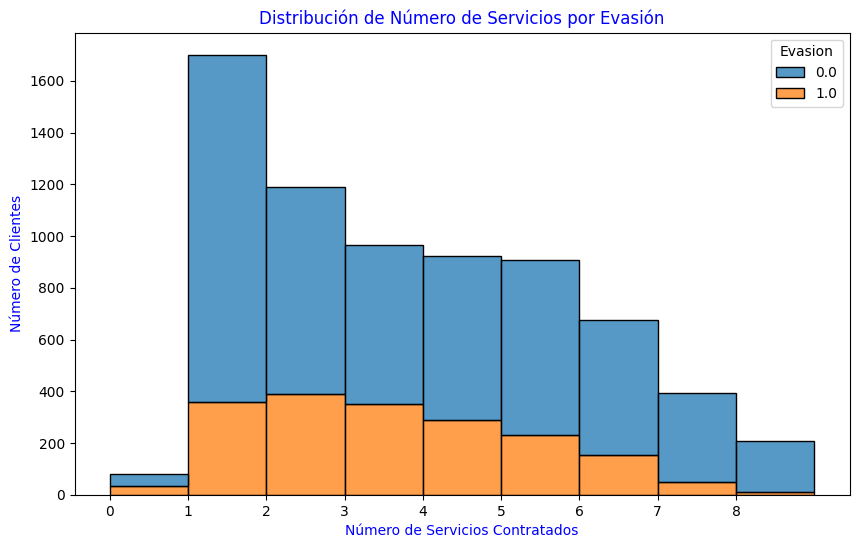

In [26]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df_transformado, x='TotalServicios', hue='Evasion',
             kde=False, bins=range(df_transformado['TotalServicios'].max() + 2),
             multiple="stack", color='lime')
plt.title('Distribución de Número de Servicios por Evasión', color='blue')
plt.xlabel('Número de Servicios Contratados', color='blue')
plt.ylabel('Número de Clientes', color='blue')
plt.xticks(range(df_transformado['TotalServicios'].max() + 1))
plt.show()

In [27]:
output_json_path = '/content/TelecomX_Processed_Data.json'

try:
    df_transformado.to_json(output_json_path, orient='records', indent=4)
    print(f"\nDataFrame transformado guardado exitosamente en '{output_json_path}'")

except NameError:
    print("\nError: 'df_transformado' no está definido. Asegúrate de haber ejecutado todas las celdas de Extracción y Transformación previamente.")
except Exception as e:
    print(f"\nError al guardar el DataFrame en JSON: {e}")



DataFrame transformado guardado exitosamente en '/content/TelecomX_Processed_Data.json'
